### Importing libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Loading dataset

In [2]:
df = pd.read_csv("vgsales.csv")
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

### Dataset Overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Data Preprocessing

In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Handling missing values

In [7]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
df.fillna({"Year":df["Year"].mean()}, inplace=True)

In [9]:
df.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [10]:
df.fillna({"Publisher":df["Publisher"].mode()[0]}, inplace=True)

In [11]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
df['Year'] = df['Year'].astype('int64') 

In [13]:
df["Year"].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


### Global Sales Distribution

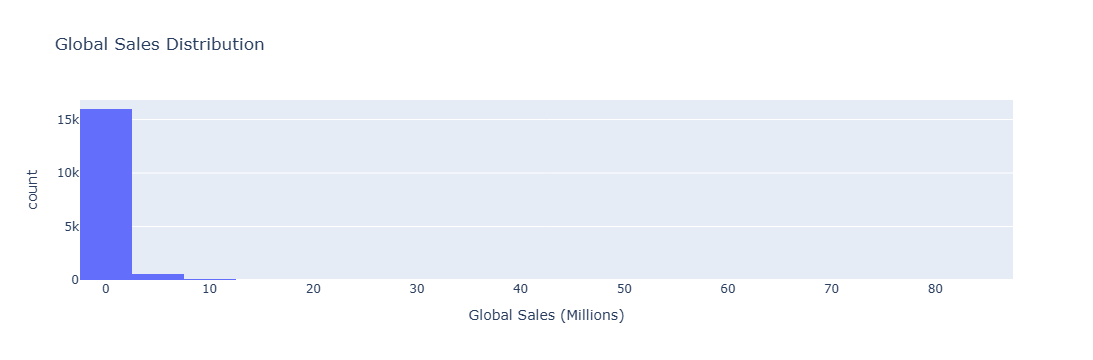

In [27]:
fig = px.histogram(df, x='Global_Sales', nbins=40, title="Global Sales Distribution",
                   labels={'Global_Sales': 'Global Sales (Millions)'})
fig.show()

### Top 10 games by global sales

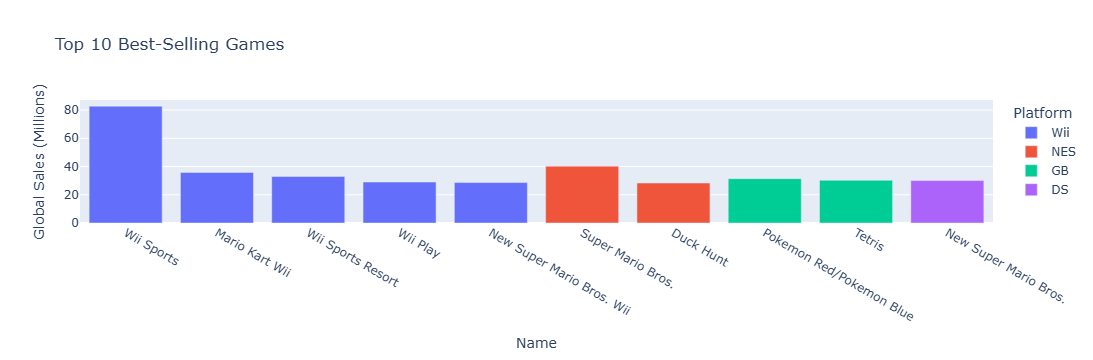

In [25]:
top10 = df.sort_values(by='Global_Sales', ascending=False).head(10)

fig = px.bar(top10, x='Name', y='Global_Sales', color='Platform',
             title="Top 10 Best-Selling Games", labels={'Global_Sales': 'Global Sales (Millions)'})
fig.show()


### Region-wise genre sales

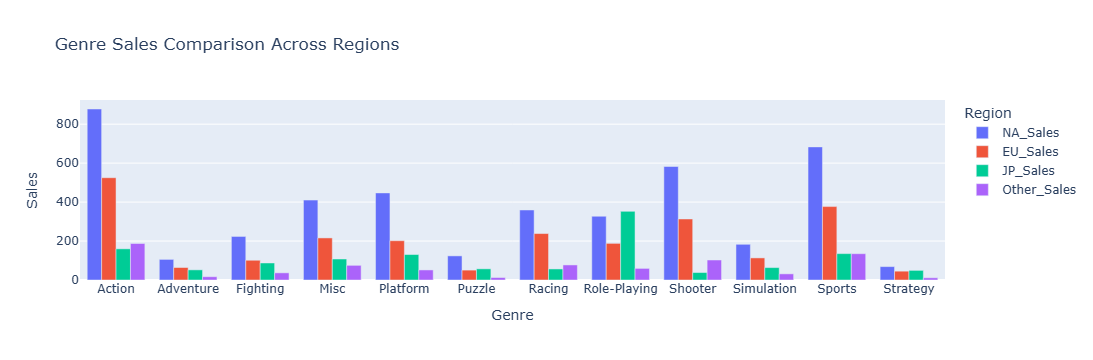

In [26]:
genre_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
genre_region = genre_region.melt(id_vars='Genre', var_name='Region', value_name='Sales')

fig = px.bar(genre_region, x='Genre', y='Sales', color='Region', barmode='group',
             title="Genre Sales Comparison Across Regions")
fig.show()

### Game Releases Over the Years 

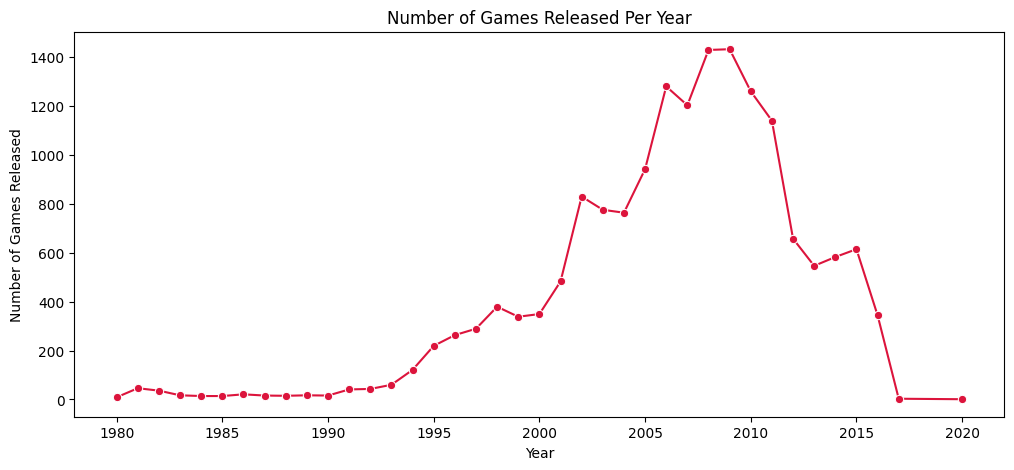

In [20]:
games_per_year = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x=games_per_year.index, y=games_per_year.values, marker='o', color='crimson')
plt.title("Number of Games Released Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Games Released")
plt.show()

### Top 10 Publishers by Global Sales

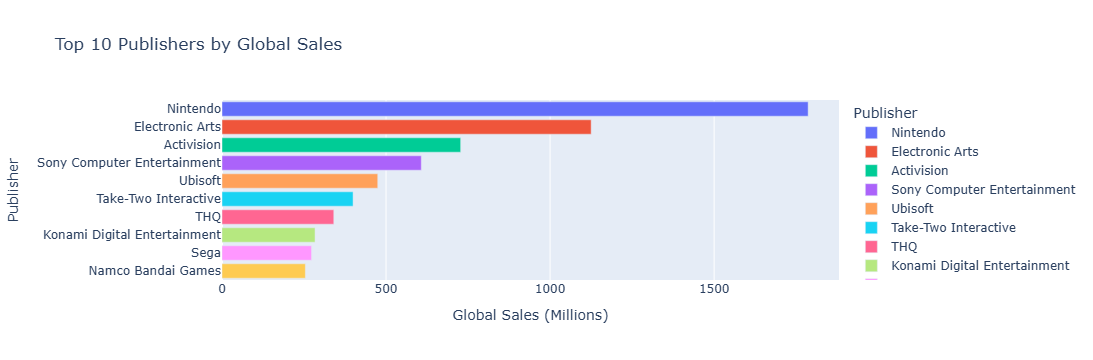

In [21]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10).reset_index()

fig = px.bar(top_publishers, x='Global_Sales', y='Publisher', orientation='h', color='Publisher',
             title="Top 10 Publishers by Global Sales", labels={'Global_Sales': 'Global Sales (Millions)'})
fig.update_layout(yaxis={'categoryorder': 'total ascending'})
fig.show()

### Global Sales By Genre

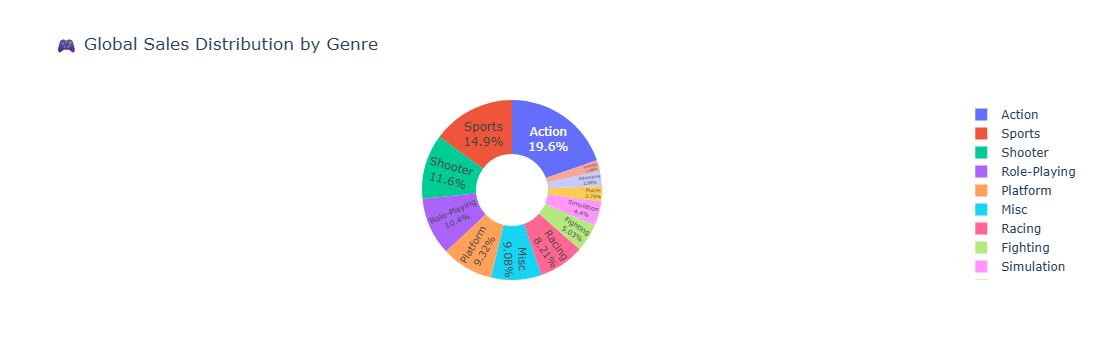

In [22]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

fig = px.pie(genre_sales, values='Global_Sales', names='Genre',
             title="🎮 Global Sales Distribution by Genre",
             hole=0.4)  # Donut style
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Correlation Heatmap of Sales by Region

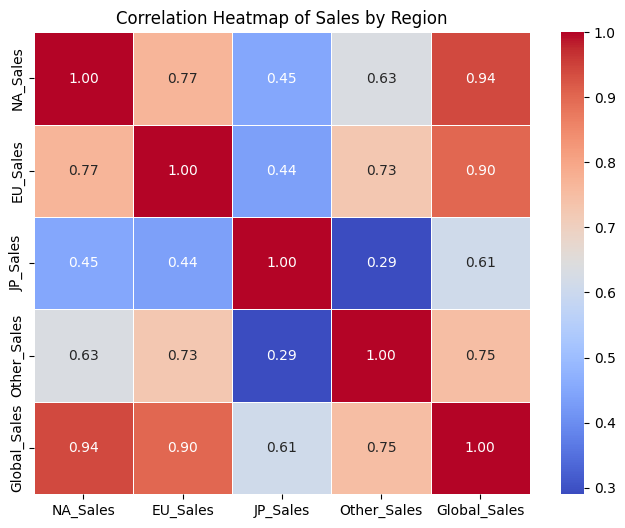

In [23]:
numeric_df = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Sales by Region')
plt.show()

### Sales comparison over the years

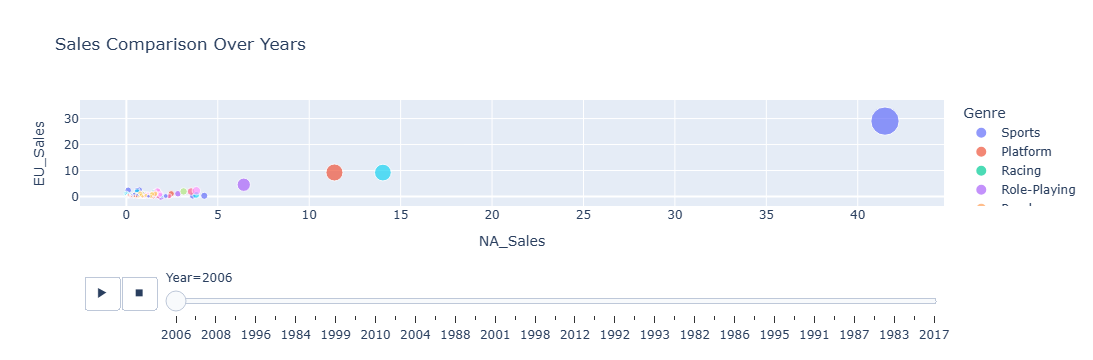

In [24]:
fig = px.scatter(df, x='NA_Sales', y='EU_Sales', animation_frame='Year', 
                 size='Global_Sales', color='Genre',
                 hover_name='Name', title='Sales Comparison Over Years')
fig.show()